Step 1: Data Preparation

In [56]:
# Import necessary libraries
import pandas as pd

In [59]:
# Load the dataset
data = pd.read_csv('apps.csv')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.0+ MB


In [61]:
apps_with_duplicates = pd.read_csv('apps.csv')

# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', apps['App'].count())

# Have a look at a random sample of 5 entries
n=5
apps.sample(n)

Total number of apps in the dataset =  9659


,Id,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
182,182,Golden Dictionary (EN-AR),BOOKS_AND_REFERENCE,4.4,51269,6.1M,"1,000,000+",Free,0,Everyone,Books & Reference,"July 19, 2018",7.0.4.6,4.2 and up
2236,2854,Muzy - Share photos & collages,PHOTOGRAPHY,4.4,70189,13M,"5,000,000+",Free,0,Teen,Photography,"August 11, 2015",4.0.10,4.0 and up
6258,7303,Chat Anónimo Gratis Español CG,DATING,3.5,69,4.0M,"5,000+",Free,0,Everyone,Dating,"July 10, 2017",1.0.2,2.3 and up
3225,4059,Smash Hit,GAME,4.5,4147718,79M,"100,000,000+",Free,0,Everyone,Arcade,"November 26, 2015",1.4.0,2.3 and up
7283,8368,Penny Puss,TOOLS,3.0,19,22M,"1,000+",Paid,$4.99,Everyone,Tools,"July 9, 2016",1.911.1944.4606,4.0 and up


# Data cleaning

In [62]:
chars_to_remove = ['+', ',', 'M', '$']
cols_to_clean = ['Installs', 'Size', 'Price']

# Loop for each column
for col in cols_to_clean:
    # Replace the characters in each column col with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col])

<ipython-input-62-234f8e8b6822>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  apps[col] = apps[col].str.replace(char, '')


# Exploring app categories

In [63]:
# Check for missing values

print(data.isnull().sum())

Id                   0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


Number of categories =  33


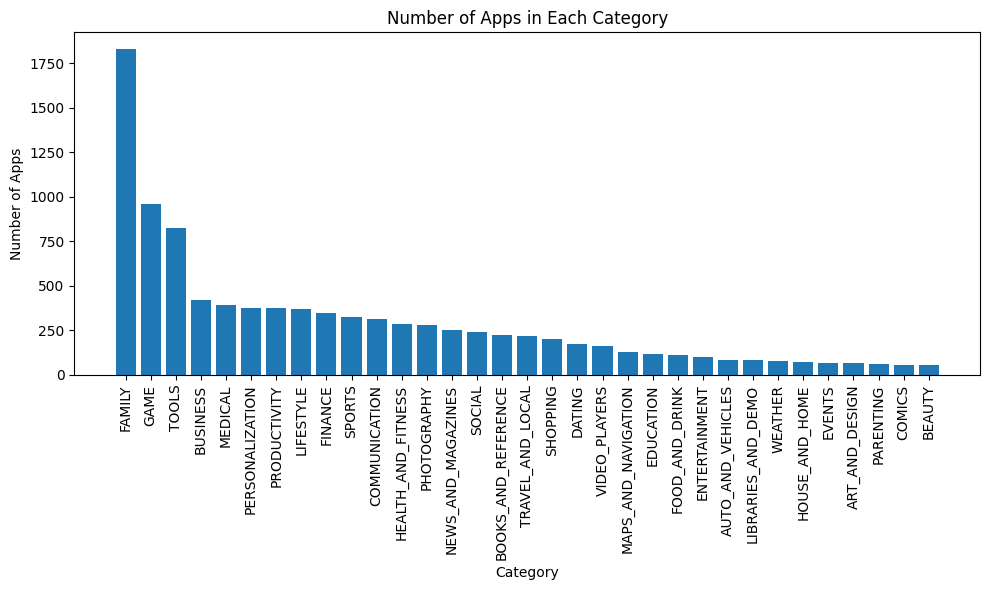

In [68]:
import matplotlib.pyplot as plt

# Print the total number of unique categories
num_categories = len(set(apps['Category']))
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them for easier plotting
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(num_apps_in_category.index, num_apps_in_category.values)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.title('Number of Apps in Each Category')
plt.tight_layout()
plt.show()


 # Distribution of app ratings

Average app rating =  4.173243045387994


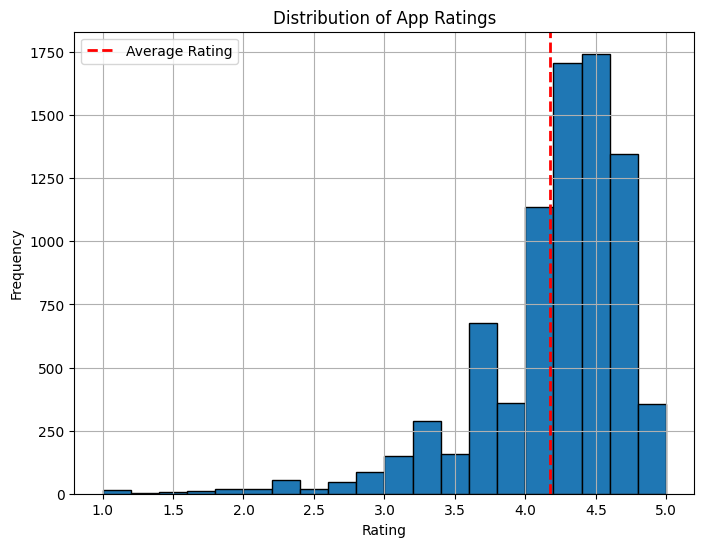

In [70]:
import matplotlib.pyplot as plt

# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

plt.figure(figsize=(8, 6))
# Plot histogram of app ratings
plt.hist(apps['Rating'], bins=20, edgecolor='black')
# Add vertical dashed line to indicate the average app rating
plt.axvline(x=avg_app_rating, color='r', linestyle='--', linewidth=2, label='Average Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of App Ratings')
plt.legend()
plt.grid(True)
plt.show()


# Size and price of an app

<Figure size 800x600 with 0 Axes>

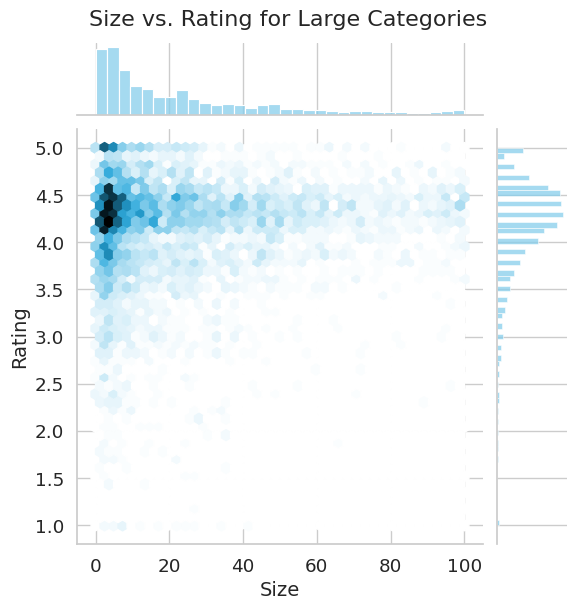

<Figure size 800x600 with 0 Axes>

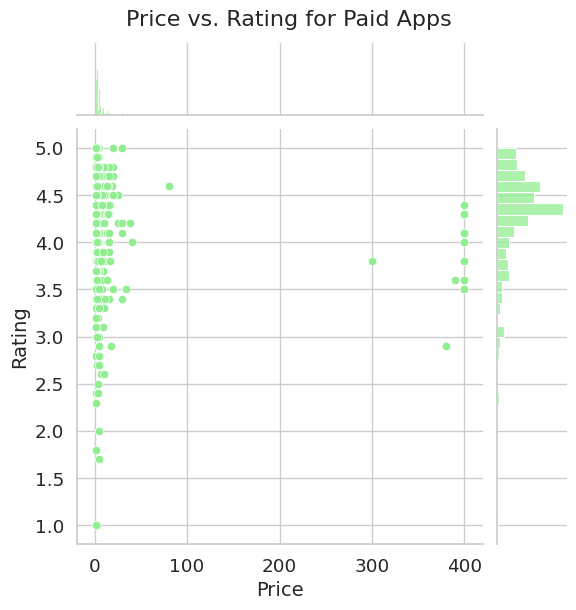

In [72]:
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")  # Changing the plot style to 'whitegrid'
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Subset for categories with at least 250 apps
large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
plt.figure(figsize=(8, 6))
sns.set_context("notebook", font_scale=1.2)  # Adjusting font size
plt1 = sns.jointplot(x='Size', y='Rating', data=large_categories, kind='hex', color='skyblue')
plt1.set_axis_labels("Size", "Rating", fontsize=14)  # Set axis labels with custom font size
plt1.fig.suptitle("Size vs. Rating for Large Categories", y=1.02, fontsize=16)  # Add title with custom font size
plt.show()

# Subset for paid apps only
paid_apps = apps[apps['Type'] == 'Paid']

# Plot price vs. rating
plt.figure(figsize=(8, 6))
plt2 = sns.jointplot(x='Price', y='Rating', data=paid_apps, color='lightgreen')
plt2.set_axis_labels("Price", "Rating", fontsize=14)
plt2.fig.suptitle("Price vs. Rating for Paid Apps", y=1.02, fontsize=16)
plt.show()


# Relation between app category and app price

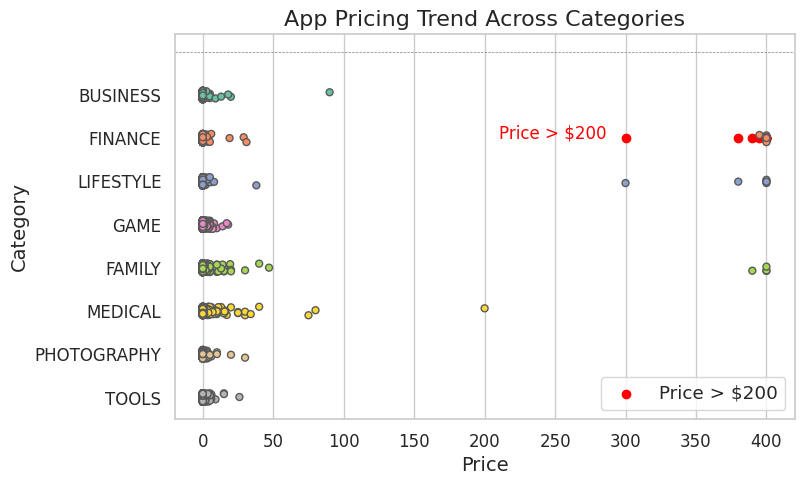

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure
plt.figure(figsize=(8, 5))

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend for the subset of categories
ax = sns.stripplot(x='Price', y='Category', data=popular_app_cats,
                   jitter=True, linewidth=1, palette='Set2')  # Using a different color palette
ax.set_title('App Pricing Trend Across Categories', fontsize=16)  # Setting the title with larger font size
ax.set_xlabel('Price', fontsize=14)  # Setting x-axis label with larger font size
ax.set_ylabel('Category', fontsize=14)  # Setting y-axis label with larger font size
ax.tick_params(axis='both', labelsize=12)  # Adjusting tick label font size

# Add a horizontal line at y=0 to separate the plot from the category labels
ax.axhline(y=-1, color='gray', linestyle='--', linewidth=0.5)

# Category, Name, and Price of apps priced above $200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
plt.annotate('Price > $200', xy=(210, 1), xytext=(210, 1), fontsize=12, color='red')  # Annotate the price range
plt.scatter(apps_above_200['Price'], [1] * len(apps_above_200), color='red', marker='o', label='Price > $200')  # Mark the apps with price > $200
plt.legend()

plt.show()


# Filter out "junk" apps

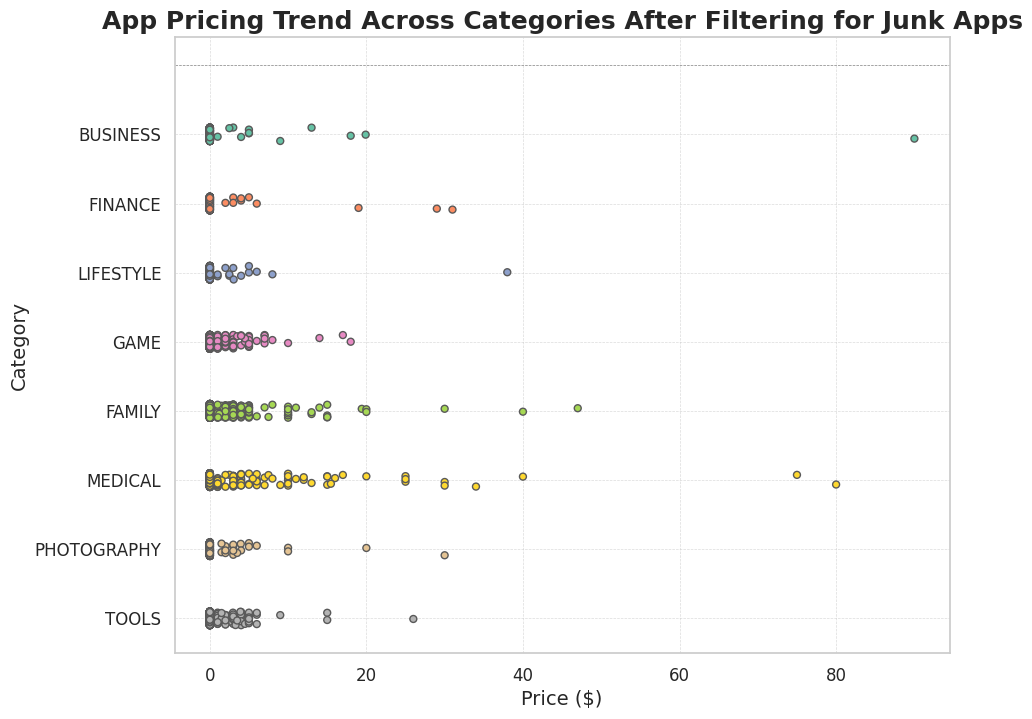

In [77]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x='Price', y='Category', data=apps_under_100,
                   jitter=True, linewidth=1, palette='Set2')  # Using a different color palette
ax.set_title('App Pricing Trend Across Categories After Filtering for Junk Apps', fontsize=18, fontweight='bold')  # Setting a more prominent title
ax.set_xlabel('Price ($)', fontsize=14)  # Setting x-axis label with larger font size
ax.set_ylabel('Category', fontsize=14)  # Setting y-axis label with larger font size
ax.tick_params(axis='both', labelsize=12)  # Adjusting tick label font size

# Add a horizontal line at y=0 to separate the plot from the category labels
ax.axhline(y=-1, color='gray', linestyle='--', linewidth=0.5)

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  # Adding a dashed grid in the background

plt.show()


# Popularity of paid apps vs free apps

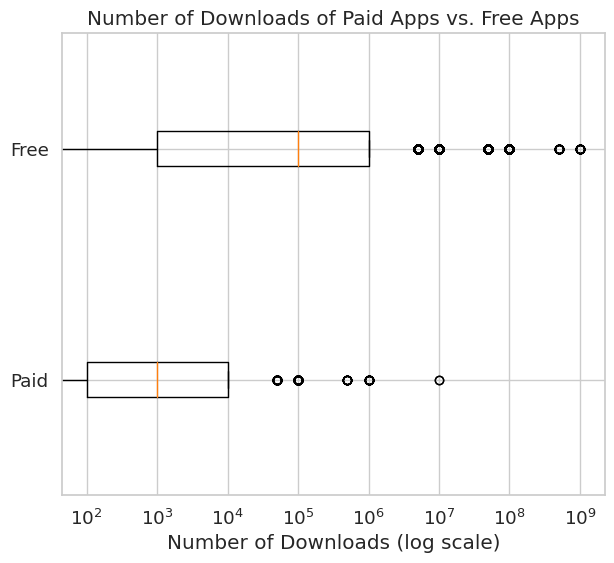

In [80]:
import matplotlib.pyplot as plt

# Filter data for paid and free apps
paid_installs = apps.loc[apps['Type'] == 'Paid', 'Installs']
free_installs = apps.loc[apps['Type'] == 'Free', 'Installs']

# Create a box plot
plt.figure(figsize=(7, 6))
plt.boxplot([paid_installs, free_installs], labels=['Paid', 'Free'], vert=False)
plt.title('Number of Downloads of Paid Apps vs. Free Apps')
plt.xlabel('Number of Downloads (log scale)')
plt.xscale('log')  # Set x-axis to logarithmic scale for better visualization
plt.grid(True)
plt.show()


# Sentiment analysis of user reviews

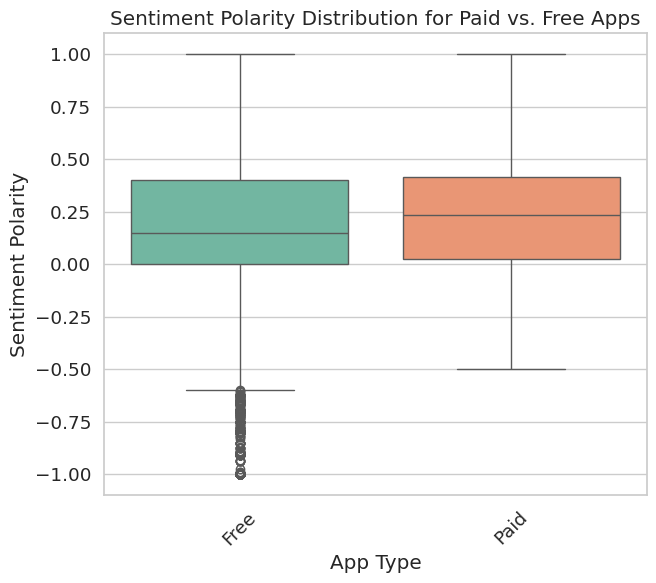

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load user_reviews.csv
reviews_df = pd.read_csv('user_reviews.csv')

# Join and merge the two dataframes
merged_df = pd.merge(apps, reviews_df, on='App', how="inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

# Set seaborn style
sns.set_style('whitegrid')

# Create the plot
plt.figure(figsize=(7, 6))

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x='Type', y='Sentiment_Polarity', data=merged_df, palette='Set2')
ax.set_title('Sentiment Polarity Distribution for Paid vs. Free Apps')
ax.set_xlabel('App Type')
ax.set_ylabel('Sentiment Polarity')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()
